# 2021년 1학기 R입문 기말고사 (ver 1.00)

- toc:false
- branch: master
- badges: true
- comments: true
- author: 최규빈

In [16]:
#hide
#options(jupyter.rich_display=FALSE)
options(repr.plot.width=6,repr.plot.height=6,repr.plot.res=150)
options(max.print=1000)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**의미가 모호한 문제는 질문할것**

**필요한 패키지는 스스로 로드하여 사용할 것** 

## `1`. 회귀분석 (35점) 

아래와 같은 수식을 고려하자. 

$$y_i= 1.5+ 5\sin(t_i)+ 3 \cos(4 t_i)+\epsilon_i, \quad i=1,2,\dots, 1000$$

여기에서 $t_i=\frac{2\pi i}{1000}$ 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,1)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 

#### `(1)` `rnorm()`을 이용하여 $\{\epsilon_i \}_{i=1}^{1000}$ 을 만들고 이를 벡터로 만들어라. 즉 아래와 같은 벡터를 생성하라. 

- $\boldsymbol{\epsilon}=(\epsilon_1,\dots,\epsilon_{1000})$

#### `(2)` $\big\{\sin(t_i) \big\}_{i=1}^{1000}$와 $\big\{\cos(4t_i) \big\}_{i=1}^{1000}$를 각각 생성하고 이를 ${\bf x}_1$와 ${\bf x}_2$에 저장하라. 즉 아래와 같은 2개의 벡터를 생성하라. 
- ${\bf x}_1=\big(\sin(\frac{2\pi}{1000}),\sin(\frac{4\pi}{1000}),\dots,\sin(2\pi)\big)$
- ${\bf x}_2=\big(\cos(\frac{8\pi}{1000}),\cos(\frac{16\pi}{1000}),\dots,\cos(8\pi)\big)$

#### `(3)` (1),(2)로 부터 $y_i$를 계산하고, $(t_i,y_i)$를 scatter plot으로 시각화 하라. 색은 'gray60'을 사용하라. 시각화 예시는 아래와 같다. 

![](https://github.com/guebin/2021IR/blob/master/_notebooks/final_fig1.png?raw=true)

#### `(4)` 두 벡터 ${\bf x}_1$, ${\bf x}_2$와 `cbind()`를 이용하여 아래와 같은 $1000 \times 3$ 매트릭스 ${\bf X}$를 만들어라. 

$${\bf X}=\begin{bmatrix}
1 & \sin(\frac{2\pi}{1000}) & \cos(\frac{8\pi}{1000})\\ 
1 & \sin(\frac{4\pi}{1000}) & \cos(\frac{16\pi}{1000})\\ 
\dots & \dots  & \dots \\ 
1 & \sin(2\pi) & \cos(8\pi)\\ 
\end{bmatrix} $$ 

#### `(5)` $3 \times 1$ 매트릭스 $\boldsymbol{\beta}=\begin{bmatrix} 1.5 \\ 5 \\ 3 \end{bmatrix}$를 만들고 매트릭스 곱을 이용하여 ${\bf X} {\boldsymbol \beta}$를 계산하라. 계산결과를 벡터화하고 (3)의 $y$축에 붉은선으로 시각화 하라. 시각화 예시는 아래와 같다. (필요하다면 적절하게 선의 굵기를 조정할 것) 

![](https://github.com/guebin/2021IR/blob/master/_notebooks/final_fig2.png?raw=true)

#### `(6)` 아래의 수식을 이용하여 $\boldsymbol{\hat\beta}$를 계산하고 계산결과를 $\boldsymbol{\beta}$와 비교하라. 

$$ \boldsymbol{\hat\beta} = ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y}$$ 

여기에서 ${\bf X}$와 ${\bf y}$는 각각 아래와 같다. 

- ${\bf X}=\begin{bmatrix}
1 & \sin(\frac{2\pi}{1000}) & \cos(\frac{8\pi}{1000})\\ 
1 & \sin(\frac{8\pi}{1000}) & \cos(\frac{16\pi}{1000})\\ 
\dots & \dots  & \dots \\ 
1 & \sin(2\pi) & \cos(8\pi)\\ 
\end{bmatrix}$,  $\quad {\bf y}=\begin{bmatrix} y_1\\ y_2\\ \dots \\ y_{1000}\\ \end{bmatrix}$

또한 ${\bf X}^\top$는 ${\bf X}$의 전치행렬(transpose) 그리고 $({\bf X}^\top {\bf X})^{-1}$은 ${\bf X}^\top {\bf X}$의 역행렬을 의미한다. 

#### `(7)` ${\bf X}\boldsymbol{\hat\beta}$를 계산하라. 계산결과를 벡터화 하고 (5)의 시각화 결과에 푸른점선으로 시각화 하라. 시각화 예시는 아래와 같다. (필요하다면 적절하게 선의 굵기를 조정할 것) 

![](https://github.com/guebin/2021IR/blob/master/_notebooks/final_fig3.png?raw=true)

## `2`. 몬테카를로 적분 (10점)

#### `(1)` $\int_{-1.96}^{1.96}\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}dx$의 값을 `runif()`를 이용한 몬테카를로 적분으로 계산하라. 

#### `(2)` `rnorm()`을 이용하여 표준정규분포에서 1000개의 확률변수를 생성하고 생성된 확률변수들 중 구간 $(-1.96 , 1.96)$사이에 있는 확률변수를 count하라. 

## `3`. 징검다리 (10점)

10명의 참가자가 (유리,강화유리)의 쌍으로 이루어진 징검다리를 건너는 게임을 시작한다. (유리,강화유리)의 쌍은 총 20개 있다. 따라서 유리는 총 40장이 있다. 참가자는 강화유리로 된 징검다리를 밟으면 살아남지만 유리로 된 징검다리를 밟으면 죽는다. 10명의 참가자의 특징은 아래와 같다. 

- 1번~8번 참가자, 10번 참가자: 50퍼센트의 확률로 강화유리를 고를 수 있다. 
- 9번 참가자: 95퍼센트의 확률로 강화유리를 고를 수 있다. 

다리를 건너는 순서는 아래와 같이 번호의 오름차순으로 건너는 방법과 번호의 내림차순으로 건너는 2가지 방법이 있다고 하자. 

- Type A: 10번 참가자부터 다리를 건너고 그 뒤로 9번, 8번, ... 1번 순으로 다리를 건넌다. 
- Type B: 1번 참가자부터 다리를 건너고 그 뒤로 2번, 3번, ... 10번 순으로 다리를 건넌다. 

8번 참가자는 Type A 와 Type B 중 어떠한 경우에 살아남을 확률이 높은가? 

## `4`. COVID19 (15점)

아래는 한국의 코로나확진자 발생수를 tibble로 불러오는 코드와 그 결과이다. 

In [ ]:
df=read_csv('https://raw.githubusercontent.com/guebin/2021IR/master/_notebooks/covid19.csv')
head(df)

Rows: 12294 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): prov
dbl (4): year, month, day, cases


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



year,month,day,prov,cases
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2020,1,20,서울,0
2020,1,20,부산,0
2020,1,20,대구,0
2020,1,20,인천,1
2020,1,20,광주,0
2020,1,20,대전,0


#### `(1)` 2020년의 확진자(cases)총합과 2021년의 확진자(cases)총합을 구하라. 

#### `(2)` 2020년 2월1일 ~ 2020년 2월15일까지의 기간동안 확진자의 합을 지역별로 나누어 구하라 (아래예시 참고). 가장 많은 확진자가 발견된 지역은 어디인가? 

즉 아래를 각각 계산하고 2020년 2월1일 ~ 2020년 2월15일 기간동안 발생한 확진자의 합이 가장 큰 지역을 찾으면 된다. 

- 2020년2월1일 ~ 2020년2월15일 기간 서울에서 발생한 확진자의 합 = 2020년2월1일 서울에서 발생한 확진자수 + ... + 2020년2월15일 서울에서 발생한 확진자수
- ...
- 2020년2월1일 ~ 2020년2월15일 기간 제주에서 발생한 확진자의 합 = 2020년2월1일 제주에서 발생한 확진자수 + ... + 2020년2월15일 제주에서 발생한 확진자수

#### `(3)` 2020년 2월16일 ~ 2020년 2월29일까지의 기간동안 확진자의 총합을 지역별로 나누어 구하라 (아래예시 참고). 가장 많은 확진자가 발견된 지역은 어디인가?

즉 아래를 각각 계산하고 2020년 2월16일 ~ 2020년 2월29일 기간동안 발생한 확진자의 합이 가장 큰 지역을 찾으면 된다. 

- 2020년2월16일 ~ 2020년2월29일 기간 서울에서 발생한 확진자의 합 = 2020년2월16일 서울에서 발생한 확진자수 + ... + 2020년2월29일 서울에서 발생한 확진자수
- ...
- 2020년2월16일 ~ 2020년2월29일 기간 제주에서 발생한 확진자의 합 = 2020년2월16일 제주에서 발생한 확진자수 + ... + 2020년2월29일 제주에서 발생한 확진자수

## `5`. 다음을 잘 읽고 물음에 답하라. (10점)

#### `(1)` cumprod 함수를 이용하여 $7!=7\times 6 \times 5 \times \dots \times 1$을 계산하라. 

In [17]:
cumprod(c(1,2,3,4,5,6,7))

[1]    1    2    6   24  120  720 5040

#### `(2)` $\sum_{n=0}^{\infty}\frac{n}{n!}$의 값을 근사적으로 계산하라. 계산결과를 exp(1)과 비교하라. 

In [23]:
sum_= 0
for (i in 0:10000) {
  sum_[i+1]=sum_[i]+(i/cumprod(c(0:i)))
}

ERROR: ignored

#### `(3)` 표준정규분포에서 1000개의 난수를 생성발생시킨 뒤 0보다 큰 수를 세어보라. 

In [18]:
A=rnorm(1000,0,1)

In [19]:
(A>0) %>% sum

[1] 513

#### `(4)` $p=0.2$인 베르누이분포에서 1000개의 난수를 만들면 1이 몇개정도 포함되는가? 시뮬레이션을 통하여 검증하라.

In [24]:
rbinom(1000,size=1,p=0.2)

[1] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0
  [75] 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 [149] 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 [223] 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 [297] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 [334] 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 [371] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 [408] 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0
 [445] 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 [556] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1
 [593] 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [630] 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 [667] 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0
 [704] 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 [741] 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1
 [778] 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 [852] 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [889] 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 [926] 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [963] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[1000] 0

#### `(5)` 아래는 표준정규분포, 즉 평균이 0이고 표준편차가 1인 정규분포에서 1000개의 난수를 생성하여 $x$라는 변수에 저장한뒤 $x$의 히스토그램을 그린 예시이다. 아래의 예시를 이용하여 평균이 1이고 표준편차가 1인 정규분포에서 5000개의 난수를 생성한뒤 $y$에 저장하고 $y$의 히스토그램을 그려라. 시각화 예시는 아래와 같다. 

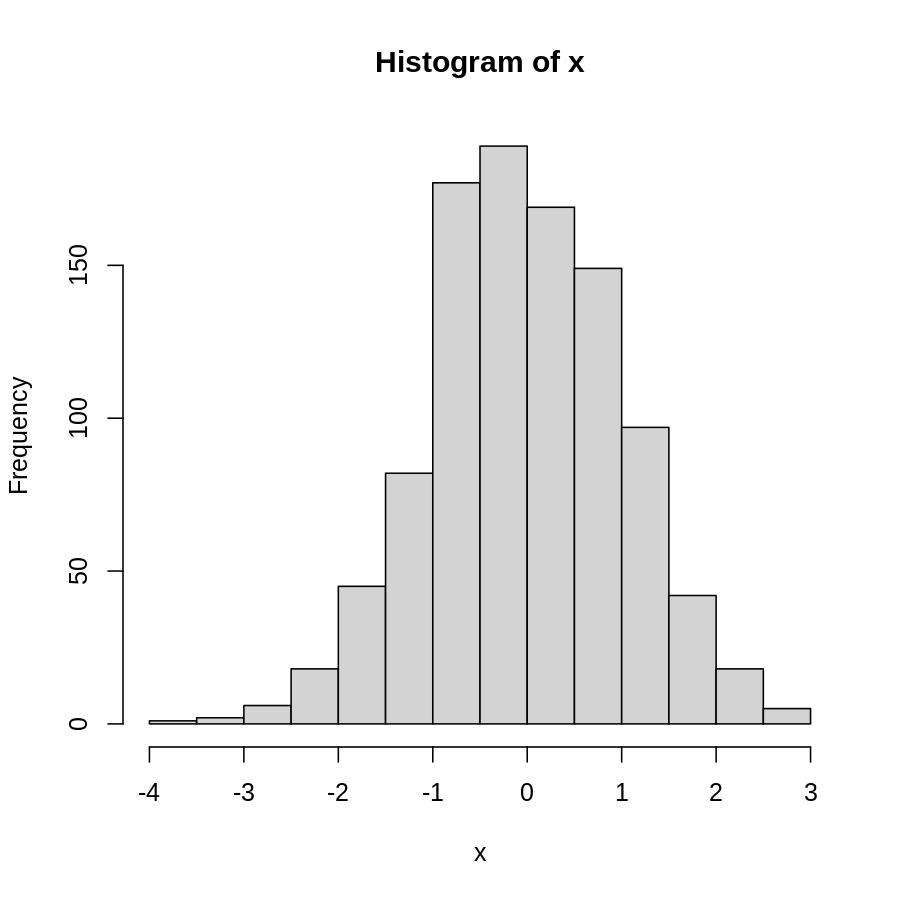

In [ ]:
x=rnorm(1000)
hist(x)

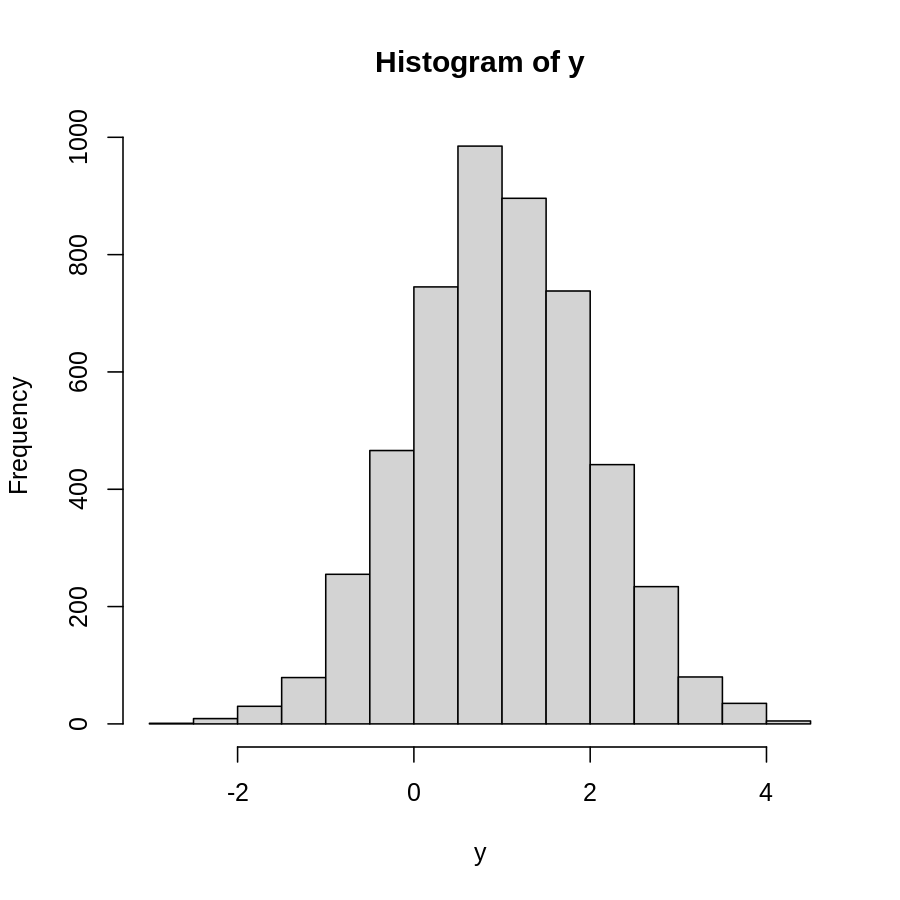

In [25]:
y=rnorm(5000,1,1)
hist(y)

#### `(6)` 아래와 같은 벡터 x에서 짝수번째 원소 (즉 x[2],x[4],$\dots$,x[2000])의 합을 구하는 코드를 작성하라 

In [ ]:
x=-1000:1000/1000


#### `(7)` 2021년 A씨의 연봉은 5000이다. 매년 연봉은 3%씩 오른다고 하자. 2030년 A씨의 연봉은 얼마인가? 

In [26]:
sal<-c()
sal[1]=5000


In [29]:
for(i in 2:10){
  sal[i] <- sal[i-1] * 1.03
}
sal[10]

[1] 1.304773

#### `(8)` 임의의 입력 $x$에 대하여 아래를 만족하는 함수를 선언하라. 

- $x >0$: $\log (x)$를 계산하여 출력 
- $x =0$: print("음의 무한대")
- $x <0$: print("x는 양수이어야 합니다.")

#### `(9)` 아래와 같은 데이터프레임이 있다고 하자. 

In [32]:
df=tibble(X1=rnorm(100),X2=rnorm(100))
head(df)

X1,X2
<dbl>,<dbl>
-1.7826085,2.6499536
0.4706837,0.5137272
0.5918595,0.4034580
-1.3358021,0.8320940
0.5155410,1.9940320
0.5434143,1.2531629


위의 데이터프레임 df에서 `mutate`를 이용하여 `Z=X1^2+X2^2`을 계산하여 새로운 열 Z를 만들어라. 

In [33]:
df %>% mutate(Z=X1^2+X2^2)

X1,X2,Z
<dbl>,<dbl>,<dbl>
-1.78260849,2.64995359,10.1999471
0.47068371,0.51372720,0.4854588
0.59185953,0.40345801,0.5130761
-1.33580208,0.83209397,2.4767476
0.51554103,1.99403197,4.2419461
0.54341426,1.25316292,1.8657164
0.45226376,-1.66334863,2.9712712
-0.43213454,0.23784672,0.2433113
-0.58980488,0.81418078,1.0107601


#### `(10)` 아래와 같은 매트릭스에서 `apply`함수를 이용하여 각 행의 합과 각 열의 합을 구하라 

In [34]:
set.seed(1221)
mat = rbinom(n=100,size=5,prob=0.5)
dim(mat)=c(10,10)
print(mat)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    2    3    3    2    2    3    1    3    3     3
 [2,]    1    3    3    4    2    2    4    2    2     1
 [3,]    2    2    2    2    4    4    2    3    3     3
 [4,]    3    2    4    5    2    5    1    4    2     2
 [5,]    2    2    2    2    1    4    2    2    3     4
 [6,]    5    1    3    1    1    3    4    2    4     3
 [7,]    4    3    4    3    2    3    2    3    0     1
 [8,]    4    4    2    3    2    3    3    0    4     2
 [9,]    5    5    4    3    2    4    4    4    1     4
[10,]    2    4    4    3    1    3    3    2    1     2


즉 아래를 구하라 

`-` 각 행의 합
- 1행의 합 = 2+3+3+ ... +3+3+3 
- ...
- 10행의 합 = 2+4+4+ ... +2+1+2

In [42]:
test=function(a) sum(a)
sum(apply(mat,1,test))

[1] 270

`-` 각 열의 합
- 1열의 합 = 2+1+2+ ... +4+5+2
- ...
- 10열의 합 = 3+1+3+ ... +2+4+2

In [43]:
test=function(a) sum(a)
sum(apply(mat,2,test))

[1] 270

## `6`. 다음을 잘 읽고 물음에 답하라. (20점)

#### `(1)` 자료 $x_1,x_2,\dots, x_{50}$에 대하여 다음 과정을 순서대로 시행하였다.

(가) 처음 두 수 $x_1$과 $x_2$의 평균을 구한다. 

(나) $x_3$을 추가하여 $x_1, x_2, x_3$의 평균을 구한다. 

(다) $x_4$을 추가하여 $x_1, x_2, x_3, x_4$의 평균을 구한다. 

...

$x_{50}$을 추가하여 $x_1, x_2, x_3 ,\dots , x_{50}$의 평균을 구한다. 

위의 과정을 시행할 결과, $x_1$과 $x_2$의 평균이 5이고, 자료 하나가 추가될때 마다 평균이 1씩 증가하였다. 이때 $x_{50}$의 값은? 

In [45]:
x<-c()
x[1]=5
x[2]=5


In [51]:
for(n in 3:50){
  temp_=mean(x[1:(n-1)])+1
  sum_=temp_*n
  x[n]=sum_ - sum(x[1:(n-1)])
}
x[50]

[1] 102

#### `(2)` 복도의 라커 

복도에 100개의 라커가 있다. 복도를 어떤 남자가 **짝수번호**의 라커를 모두 연다. 그리고 나서 3의 배수의 라커를 전부 닫는다. 그 다음에는 번호가 4의 배수인 라커를 순서대로 찾아다니며 열려 있으면 닫고, 닫혀 있으면 연다. 그 다음에는 번호가 5의 배수인 라커를 순서대로 찾아다니며 열려있으면 닫고, 닫혀있으면 연다. 이후에 6의 배수, 7의 배수 .. 인 라커를 순서대로 찾아다니며 행동을 반복한다. 이런식으로 복도를 **50번** 지나가면 열린 라커의 문은 몇개가 되겠는가? (주의: 중간고사문제와 약간다릅니다, 다른부분은 볼드체 표시했습니다)

#### `(3)` 몬테카를로 시뮬레이션을 이용하여 원주율 $\pi$를 추론하는 코드를 작성하라. 

#### `(4)` 아래와 같은 연립일차방정식을 푸는 R코드를 작성하라. 

$\begin{cases}
w+2x+3y+4z=1 \\
2w+2x+y=9 \\
x-y=4 \\
3w+x-y+3y=7
\end{cases}$


#### `(5)` 우산의 회전

다음은 인터넷에서 어떠한 자료를 다운받아 매트릭스로 저장하는 코드이다. 
```R
df=read.csv("https://raw.githubusercontent.com/guebin/2021IR/master/_notebooks/round2.csv")
X=as.matrix(df)
```
매트릭스는 `X`이라는 변수에 저장되어 있다. 저장된 모양은 아래와 같다. 
$${\bf X}= 
\begin{bmatrix}
x_1 & y_1 \\ 
x_2 & y_2 \\ 
\dots & \dots \\ 
x_{5513} & y_{5513}
\end{bmatrix}
$$
아래를 계산하여 $\tilde{\bf X}$를 만들고 
$$
\tilde{\bf X}={\bf X} \begin{bmatrix}
\cos(\frac{\pi}{4}) & -\sin (\frac{\pi}{4}) \\
\sin(\frac{\pi}{4}) & \cos (\frac{\pi}{4})
\end{bmatrix} 
$$

In [57]:
df=read.csv("https://raw.githubusercontent.com/guebin/2021IR/master/_notebooks/round2.csv")
X=as.matrix(df)

In [58]:
head(df)

,x,y
,<int>,<int>
1,12,313
2,12,314
3,13,279
4,13,311
5,13,312
6,13,313


$\tilde{\bf X}$의 첫번째열을 $x$축으로, 두번째열을 $y$축으로 하여 시각화 하라. 시각화 예시는 아래와 같다. 

In [60]:
X_ = cbind(x,y) %*% rbind(c(cos(pi/4),-sin(pi/4)),c(sin(pi/4),cos(pi/4)))


In [61]:
plot(matrix[,1],matrix[,2],col='black',lty=2)

ERROR: ignored

![](https://github.com/guebin/2021IR/blob/master/_notebooks/final_fig5.png?raw=true)